# Exercise 3.1: 
Is it enough to insert the given solution into the equation? If not the soulution can be found by applying a Fourier transform to the diffusion equation (4K).
Possible physical interpretaion of h(y): This represents the initial distribution of the substance, as is obvious if the solution is shown using the Fourier transform. 

https://wiki.math.ntnu.no/_media/tma4120/2019h/heat2018.pdf

Skal vise at 

$\phi(x,t) = \frac{1}{\sqrt{4\pi Dt}} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}}$

Er en løsning av

$\frac{\partial \phi(x, t)}{\partial t} = D\frac{\partial^2\phi(x,t)}{\partial^2x}$.

Regner først ut

$\frac{\partial \phi(x, t)}{\partial t} = -\frac{1}{2} \frac{1}{\sqrt{4\pi Dt}} \frac{1}{t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}} + \frac{1}{\sqrt{4\pi Dt}} \frac{1}{t^2}\int^{+\infty}_{-\infty}dy\,h(y) \, \frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} = \frac{1}{\sqrt{4\pi Dt}}(\frac{1}{t^{2}} \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} - \frac{1}{2t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}})$.

Deretter finner vi

$\frac{\partial\phi(x,t)}{\partial x} = \frac{1}{\sqrt{4\pi Dt}} (-\frac{1}{4Dt}) \int^{+\infty}_{-\infty}dy\,h(y)\,(2x-2y)e^{-\frac{(x-y)^2}{4Dt}}$

$\implies \frac{\partial^2 \phi(x,t)}{\partial^2 x} = \frac{1}{\sqrt{4\pi Dt}}\frac{1}{4Dt}(-\int^{+\infty}_{-\infty}dy\,h(y)\,2e^{-\frac{(x-y)^2}{4Dt}} + \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(2x-2y)^2}{4Dt}e^{-\frac{(x-y)^2}{4Dt}}) = \frac{1}{D\sqrt{4\pi Dt}}(\frac{1}{t^{2}} \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} - \frac{1}{2t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}})$.

$\implies \frac{\partial \phi(x, t)}{\partial t} = D\frac{\partial^2\phi(x,t)}{\partial^2x}$ $$\tag*{$\blacksquare$}$$.


# Exercise 3.2:
The probability of finding an particle in position $x$ in a potential landscape $V(x)$ is given by $P(x) = Ze^{-\beta V(x)}$, where $Z$ is the canonical partition function of the system and $\beta = (k_b T)^{-1}$.

During a random walk the probability for a particle to move in positive direction, stay put or move in negative direction is $\{p^{+}, p^{0}, p^{-}\}$, and the sum of them must add up to one. That means the probabilities must satisfy the equation $p^{+} + p^{0} + p^{-} = 1$. We assume each of the probabilities are proportional to $P(x)$ and that the proportionality constant, $C$, is equal for all steps. If the position before a random walk step is $x_0$ we get $p^{+}=CP(x_0+1)$, $p^{0}=CP(x_0)$ and $p^{-}=CP(x_0-1)$. By putting these expressions in the equation above we find the constant $C=\frac{1}{P(x_0+1)+P(x_0)+P(x_0-1)}$ 
and find the desired probabilities:

$p^{+}=\frac{P(x_0+1)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0-1)-V(x_0+1)]}+e^{-\beta [V(x_0)-V(x_0+1)]}}$

$p^{0}=\frac{P(x_0)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0-1)-V(x_0)]}+e^{-\beta [V(x_0+1)-V(x_0)]}}$

$p^{-}=\frac{P(x_0-1)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0+1)-V(x_0-1)]}+e^{-\beta [V(x_0)-V(x_0-1)]}}$.

# Exercise 3.3:
Use the Taylor series expansion of $e = 1 + x + \frac{x²}{2} + ...$

* I would imagine that a very high temperature makes the probabilties equal. Therefore they should be $\frac13$ each. This makes sense with the Taylor series of $e \approx 1$ when $x<<1$.
* When $x>>1$ the probabilites go towards zero, if I am not mistaken. 

How can the random walk problem be simplified using an energy scale argument in the two limits?
* Limit 1: The difference in potentials when changing x is negligible if the temperature is very large
* Limit 2: If the temperature is very low, the diffusion stops? Absolute zero?

# Warm-up exercises:
* Start with 10000 particles at x = 0
* Each particle is subject to a random walk for 200 time steps
* Step length h = 1
* Time step $\Delta t = 1$

Pick a random number between 0 and 1. Walk in the directions that the probabilities dictate. 

## Programming exercise 4.1: 

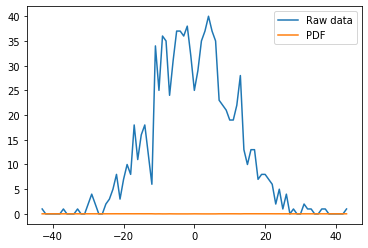

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 
from math import e
import random as rand

#temp = 100 #for example. 
#beta = k_b*temp

# Probabililities from ex. 3 
def p_plus(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0+1)))+e**(-beta_k*(V(x_0)-V(x_0+1))))

def p_zero(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0)))+e**(-beta_k*(V(x_0+1)-V(x_0))))

def p_minus(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0+1)-V(x_0-1)))+e**(-beta_k*(V(x_0)-V(x_0-1))))

#Constants for ex. 4
time_steps = 200
amount_of_particles = 1000
beta_k = [0.01, 1, 100] # betaAndK = one value from the list beta_k
step_length = 1


#Makes Result with a potential V and value betaAndK. 
def get_result(V, betaAndK):
    init = np.zeros((amount_of_particles,), dtype=int)
    for step in range(time_steps):
        for position in range(len(init)):
             
                p = np.random.uniform()
                if p <= p_minus(init[position],V, betaAndK):
                    init[position] -= 1
                elif p >= (1-p_plus(init[position],V, betaAndK)):
                    init[position] += 1
    return init

#Plotting result
def plot_result(result):
  y = np.zeros(((max(result)-min(result))+1,),dtype=int)
  for element in result:
    indeks = int(element-min(result))
    y[indeks] += 1   
  x = np.arange(min(result), max(result)+1, 1)
  plt.plot(x,y, label="Raw data")
  #Får ikke til scipy.fit!
  mean, std = norm.fit(y)
  pdf = norm.pdf(y, mean, std)
  plt.plot(x, pdf, label="PDF")
  plt.legend()
  plt.show()

  #fig, axs = plt.subplots(1, 3, figsize=(10, 4), tight_layout=True)
  #axs[0].plot(x,y) #example on how to plot subplots, but need to do some changes to be able to plot all three of them
  #axs[1].plot(x,y) #Maybe hard to do in one general function like this
  #axs[2].plot(x,y)
  #plt.plot(x,y)
  #####plt.plot(x, norm.pdf(y)) #use norm to fit somehow
  #plt.show()

# Potential number one, the constant k is with betaAndK in getResult
def V_1(x):
    return 1

plot_result(get_result(V_1,beta_k[0])) #Burde heller plottes i subplots til senere. 
#plotResult(getResult(V_1,beta_k[1]))
#plotResult(getResult(V_1,beta_k[2]))
 ## Ser at grafene til V_1 er uavh. av verdien til betaAndK


# Mangler å fitte(!) normalfordelingene + ev. diskusjon rundt resultatene. 

## Programming exercise 4.2:

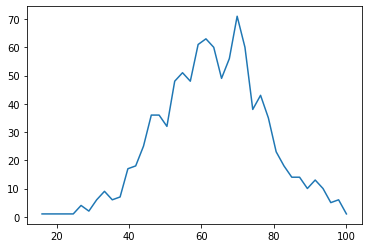

In [0]:
def V_2(x):
    return x

plot_result(get_result(V_2,beta_k[0])) #Skjer noe merkelig med beta_k[2]


## Programming exercise 4.3:


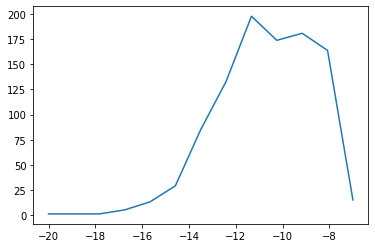

In [0]:
def V_3(x):
    return ((x/20)+np.sin(x/5))

plot_result(get_result(V_3,beta_k[2]))

## Programming exercise 4.4:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars


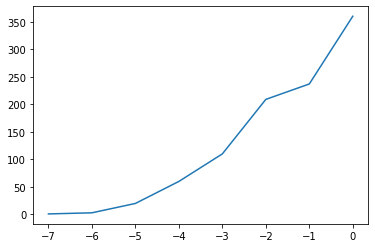

In [0]:
def V_4(x):
    return x**2

plot_result(get_result(V_4,beta_k[2])) #RuntimeWarning ved beta_k[2]
#Ser ut som veldig få datapunkter med høy verdi av beta*k

# 5 Random walk in a ratchet potential

In [0]:
import numpy as np

def V_sawtooth(x): #N_x steps is the spatial period of V_1(x)
  assert (-(1-alpha)*N_x < x <= alpha*N_x)
  return k*x/(alpha*N_x) if (0 < x <= alpha*N_x) else -k*(x/((1-alpha)*N_x))
  
def V_constant(x):
  #Constant function of x, magnitude not important. 
  #Therefore, we define it as 1
  c = 1
  return c

def J(t_i): #Normalized particle current
  pass
  return (n_plus(t_i)-n_minus(t_i))/N_p

## 5.1 Programming exercise 5.1

In [39]:
import numpy as np
#Constants
h = 1
k = 1 #defined for now (I am guessing that we do not know k here neither, but that can be fixed later)
alpha = 0.8 #Defines x-positions of the teeth's peaks
N_x = 90 #Spatial period of V_1(x)
T_p = 500 #Time interval between excitation and de-excitation
delta_t = 1
betak = 1000
N_p = 12*N_x

assert(0 <= alpha <= 1)

particles = np.zeros(N_p,dtype = int)

def fill_particles(particles):
    '''
    Fills the particle array with the given position of each particle
    '''
    number = 0
    for i in range(1,len(particles)+1):
        particles[i-1] = number
        if i%6 == 0:
            number += 1


time_steps = 20*T_p

cycles = 10
#Ytre løkke: Passer på cycles og avgjør potensialet
    #Indre løkke: tar seg av time steps og teller opp antallet so, 
    #beveger seg til sidene. Kalkulerer J og lagrer i en ytre liste
    #slik at average kan tas til slutt
for excitation in range(2*cycles):
    if excitation%2 == 0:
        #V_constant(x_axis_with_particles)
        #Constant potential
        pass
    else:
        #sawtooth potential
        pass
    for step in range(steps):
        #beveg på partiklene avhengig av sannsynligheten
        pass
        
for t in range(time_steps+1):
    
  if t%T_p == 0: #partall
    #Kjør V_1(x) på alle 
    pass
  elif t%T_p == 1: #oddetall
    #Kjør V_2(x) på alle
    pass
  #Calculate the cycle averaged current for each cycle. 





[ 15  15  15  15  15  15  16  16  16  16  16  16  17  17  17  17  17  17
  18  18  18  18  18  18  19  19  19  19  19  19  20  20  20  20  20  20
  21  21  21  21  21  21  22  22  22  22  22  22  23  23  23  23  23  23
  24  24  24  24  24  24  25  25  25  25  25  25  26  26  26  26  26  26
  27  27  27  27  27  27  28  28  28  28  28  28  29  29  29  29  29  29
  30  30  30  30  30  30  31  31  31  31  31  31  32  32  32  32  32  32
  33  33  33  33  33  33  34  34  34  34  34  34  35  35  35  35  35  35
  36  36  36  36  36  36  37  37  37  37  37  37  38  38  38  38  38  38
  39  39  39  39  39  39  40  40  40  40  40  40  41  41  41  41  41  41
  42  42  42  42  42  42  43  43  43  43  43  43  44  44  44  44  44  44
  45  45  45  45  45  45  46  46  46  46  46  46  47  47  47  47  47  47
  48  48  48  48  48  48  49  49  49  49  49  49  50  50  50  50  50  50
  51  51  51  51  51  51  52  52  52  52  52  52  53  53  53  53  53  53
  54  54  54  54  54  54  55  55  55  55  55  55  5

NameError: name 'steps' is not defined

## Programming exercise 5.2

## Programming exercise 5.3

# 6 Analytical solution

## Programming exercise 6.1

## Programming exercise 6.2

## Programming exercise 6.3

## Exercise 6.4